# start_pakistan_correlations
## HWFL_computeCorrel.ipynb
This script computes correlation between the Pakistan HW and FL systems, using the data on the triggers per year which has already been computed via the codes "HW_calcTriggers.ipynb" and "FL_calcTriggers.ipynb". It compares the 19 year historical HW record with a 19 year record of FL triggers, derived via the YLY (and so we repeat for many iterations of the FL record and take an average of the ensemble result).

In [2]:
from pathlib import Path
import os
import sys
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

C:\Users\alexa\AppData\Local\Temp\ipykernel_13172\4234477562.py:9: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [3]:
# Set the root path
rootPath = Path.cwd().parents[0]
crossPerilPath = Path.cwd()
hwPath = rootPath/'HW/data'
flPath = rootPath/'FL/data'

## Get the HW and FL data on n triggers per year

In [4]:
nyears=19
flData = pd.read_csv(flPath/'realisations'/('realisationsTriggersMax1_'+str(nyears)+'years.csv'), index_col=0).T

In [5]:
flData

,1,2,3,4,5,6,7,8,9,10,...,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982
1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
6,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
10,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [5]:
hwPath = rootPath/'hw/data/city_triggers'
hwData = pd.read_csv(hwPath/'triggerYears.csv', index_col=0)

# Set the actual years back to arbitrary years from 1 to 19
hwData.index=list(range(1,len(hwData.index)+1))

# Cap triggers at max of one per location per year and add a column with total no triggers across all locations per year
hwData[hwData>1]=1
hwData['allSites']=hwData.T.sum()

hw=hwData.allSites

hwData

,Jacobabad,Karachi_Jinnah_Airport,Lahore,Multan,Nawabshah,Sibi,allSites
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,0.0,3.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,1.0,0.0,0.0,3.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,1.0,0.0,0.0,0.0,2.0
7,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,0.0,0.0,1.0,1.0,0.0,0.0,2.0
10,0.0,1.0,1.0,0.0,0.0,0.0,2.0


## Compute correlation in the trigger time series for the two perils
Compare the binary trigger / no trigger from flood with the number of locations triggered for heatwave. Repeat it for every realisation of the flood results, then take the median as the final result.

In [6]:
# Loop through the flood realisations
correlsResultData=pd.DataFrame(data=[], index=['FLRealisation','pearson-r','p']).T

for i in list(flData.columns):
    
    # Get the flood realisation
    fl=flData[i]
    
    # Compute Pearson correlation between hw and fl
    correlResult = list(pearsonr(hw, fl)) # (Pearson's correlation coefficient, 2-tailed p-value)
    
    # Record in dataframe
    correlResultData  = pd.DataFrame(data=[i] + correlResult, index=correlsResultData.columns).T
    correlsResultData = pd.concat(objs=[correlsResultData, correlResultData])

In [79]:
# Write out as csv
outPath=crossPerilPath/'data'
outPath.mkdir(exist_ok=True)
correlsResultData.to_csv(outPath/'hwfl_correlation.csv', index=False)

## Summarize correlation results across the realisations

In [8]:
correlResultsSummary = correlsResultData.describe()
correlResultsSummary

,FLRealisation,pearson-r,p
count,9982.000000,9982.000000,9982.000000
mean,4991.500000,0.000443,0.484274
std,2881.699527,0.247948,0.295515
min,1.000000,-0.767004,0.000127
25%,2496.250000,-0.178193,0.234816
50%,4991.500000,-0.004678,0.465472
75%,7486.750000,0.179918,0.740640
max,9982.000000,0.759634,0.984836


The high standard deviation indicates a large amount of uncertainty in the result. On average the statistical significance for each realisation is low.

## Check the results for the realisation which had the highest statistical significance
Take the top 10%ile for example

In [9]:
# Add median to pandas describe
quant=0.001
print(np.quantile(correlsResultData.p,quant))
correlsResultDataSub = correlsResultData[correlsResultData.p<=np.quantile(correlsResultData.p,quant)]
# correlsResultDataSub = correlsResultData[correlsResultData.p<=0.05]
correlResultsSubSummary = correlsResultDataSub.describe()
correlResultsSubSummary

0.0007234592455512623


,FLRealisation,pearson-r,p
count,13.000000,13.000000,13.000000
mean,4896.769231,0.164835,0.000414
std,1651.045535,0.744070,0.000243
min,504.000000,-0.767004,0.000127
25%,4510.000000,-0.724929,0.000177
50%,5112.000000,0.706379,0.000446
75%,5835.000000,0.736408,0.000723
max,7191.000000,0.759634,0.000723


The end median result is very sensitive to what threshold (or quantile) we use. It can flip from positive to negative. This is because choosing the most statistically significant results favors the results which have a strong magnitude signal i.e., strong positive, or strong negative. So we get a mix of +0.7 and -0.7. The median can just happen to be either a negative or positive, but always strong. 

The random ordering might be causing issues. Should use sliding cross-correlation here?

But this also suggests that we should look at the mean. Each realisation can produce a potentially strong result (statistically significant and with a strong magnitude). Because our realisations represent all possible versions of reality. Maybe we need a different metric here, which looks at similarity rather than correlation? I.e., a metric that disregards the order

### Note
Since we have allowed up to 6 triggers for the heatwave model, this correlation describes the likelihood that having more activations in a heatwave season increases (or decreases) the likelihood of having a flood activation.

#### Does it make a difference to normalize the heatwave triggers to [0,1] by dividing by 6?

## Time-lagged cross correlation

In [13]:
# Function to compute cross correlation, from https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9
def crosscorr(datax, datay, lag=0, wrap=False):

    if wrap==True:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        # corr=datax.corr(shiftedy)
        corr=list(pearsonr(datax, shiftedy))
        return corr
    
    else: 
        # corr=datax.corr(datay.shift(lag))
        corr=list(pearsonr(datax, datay.shift(lag)))
        return corr

In [41]:
# Loop through the flood realisations
crossCorrelsResultData=pd.DataFrame(data=[], index=['FLRealisation','pearson-r','p']).T

for i in list(flData.columns):
    
    # Get the flood realisation
    fl=flData[i]
    
    # Get the r and p values for all lags from 0 to nyears, using the cross correlation function
    crosscorrel = [crosscorr(hw, fl, lag, wrap=True) for lag in range(1,nyears+1)]
    crosscorrel_r = [item[0] for item in crosscorrel]
    crosscorrel_p = [item[1] for item in crosscorrel]

    # Record the highest pearson's correlation r
    r = crosscorrel_r[np.argmax([abs(item) for item in crosscorrel_r])]
    p = crosscorrel_p[np.argmax([abs(item) for item in crosscorrel_r])]
    
    # Record in dataframe
    crossCorrelResultData  = pd.DataFrame(data=[i, r, p], index=crossCorrelsResultData.columns).T
    crossCorrelsResultData = pd.concat(objs=[crossCorrelsResultData, crossCorrelResultData])

In [42]:
# Write out as csv
outPath=rootPath/'cross-peril'
outPath.mkdir(exist_ok=True)
crossCorrelsResultData.to_csv(outPath/'hwfl_crossCorrelationMaxPearson.csv', index=False)

In [43]:
crossCorrelResultsSummary = crossCorrelsResultData.describe()
crossCorrelResultsSummary

,FLRealisation,pearson-r,p
count,9982.000000,9982.000000,9982.000000
mean,4991.500000,-0.014212,0.064651
std,2881.699527,0.491177,0.068174
min,1.000000,-0.818820,0.000018
25%,2496.250000,-0.472598,0.013390
50%,4991.500000,-0.286239,0.037203
75%,7486.750000,0.481267,0.090601
max,9982.000000,0.778625,0.548730


In [53]:
colors=[
(68/255,84/255,106/255),    
(254/255,106/255,70/255), 
(133/255,239/255,205/255),
(255/255,192/255,0/255),    
(165/255,165/255,165/255), 
(255/255,193/255,179/255), 
(184/255,193/255,218/255),    
(24/255,186/255,134/255)
]

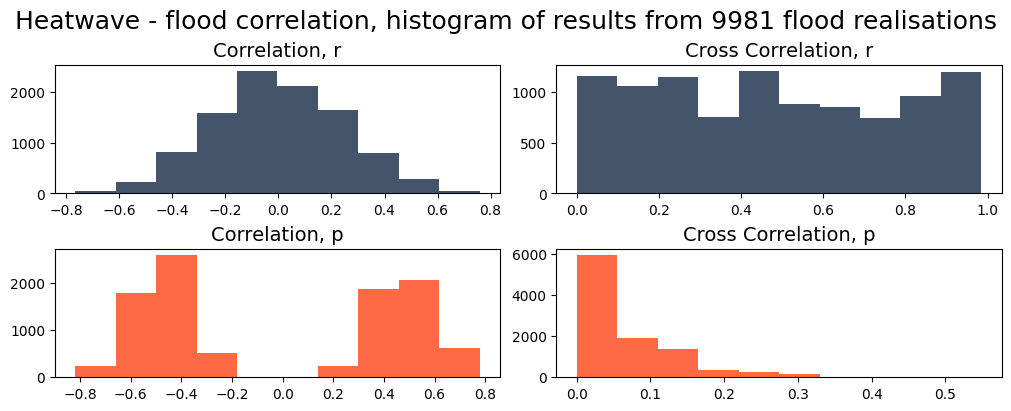

In [57]:
plotData=[correlsResultData['pearson-r'], correlsResultData['p'], crossCorrelsResultData['pearson-r'], crossCorrelsResultData['p']]
plotTitles=['Correlation, r', 'Cross Correlation, r', 'Correlation, p', 'Cross Correlation, p']
plotColors=[colors[0], colors[0], colors[1], colors[1]]

fig, axes = plt.subplots(2,2,figsize=(10,4), constrained_layout=True)
fig.suptitle('Heatwave - flood correlation, histogram of results from 9981 flood realisations', fontsize=18)

for i, pltData in enumerate(plotData):
    ax=axes.ravel()[i]
    ax.hist(plotData[i], color=plotColors[i])
    ax.set_title(plotTitles[i], fontsize=14)

plt.show()

In this result, having allowed the flood time series to shift across the entire heatwave time series and find the lag/delay with the highest correlation value, we now have a set of results with on average much higher statistical significance. The standard deviation is higher since we have pulled more extreme correlation results. Again the mean is close to zero. Here, the median is slightly negative.

These methods are still limited, but doing both approaches can give some confidence to the outcome.

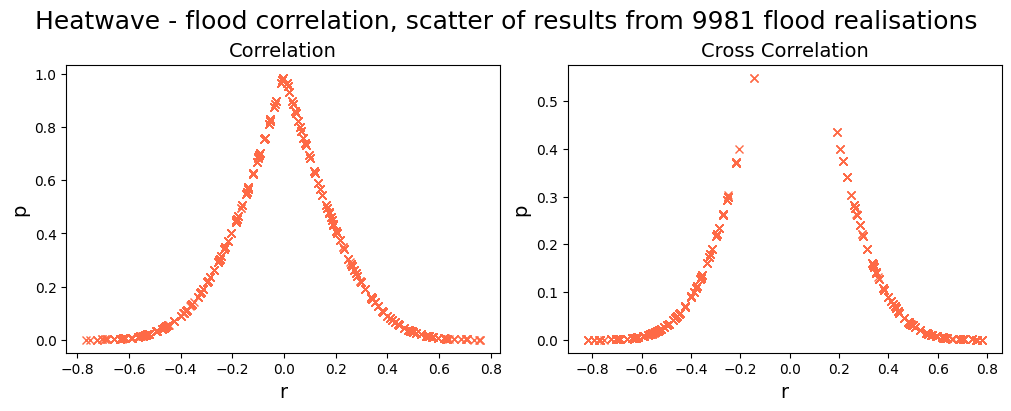

In [60]:
plotData=[correlsResultData['pearson-r'], correlsResultData['p'], crossCorrelsResultData['pearson-r'], crossCorrelsResultData['p']]
plotTitles=['Correlation', 'Cross Correlation']

fig, axes = plt.subplots(1,2,figsize=(10,4), constrained_layout=True)
fig.suptitle('Heatwave - flood correlation, scatter of results from 9981 flood realisations', fontsize=18)

for i in range(0, len(plotTitles)):
    ax=axes.ravel()[i]
    ax.plot(plotData[i*2], plotData[i*2+1], marker='x', color=colors[1], linestyle='none')
    ax.set_title(plotTitles[i], fontsize=14)
    ax.set_xlabel('r',fontsize=14)
    ax.set_ylabel('p',fontsize=14)

plt.show()